# Polymorphism of Carbon

In [1]:
%matplotlib inline
import numpy
import pyFAI
from matplotlib.pyplot import subplots
from pyFAI.calibrant import get_calibrant
from pyFAI.gui import jupyter
print(f"pyFAI version: {pyFAI.version}")

pyFAI version: 2025.11.0-dev0


In [2]:
wavelength = 1e-10
diamond = get_calibrant("diamond")
graphite = get_calibrant("graphite")
C60 = get_calibrant("C60")
diamond.wavelength = graphite.wavelength = C60.wavelength = wavelength
print(diamond)
print(graphite)
print(C60)

diamond Calibrant with 2 reflections at wavelength 1e-10
graphite Calibrant with 10 reflections at wavelength 1e-10
C60 Calibrant with 17 reflections at wavelength 1e-10


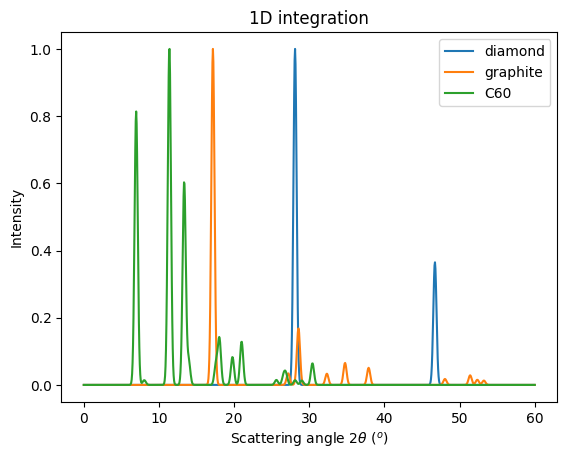

In [3]:
param = {"tth_range":(0,60), 'resolution': 0.5}
ax = jupyter.plot1d(diamond.fake_xrpdp(**param), label="diamond")
ax.plot(*graphite.fake_xrpdp(**param), label="graphite")
ax.plot(*C60.fake_xrpdp(**param), label="C60")
ax.legend();

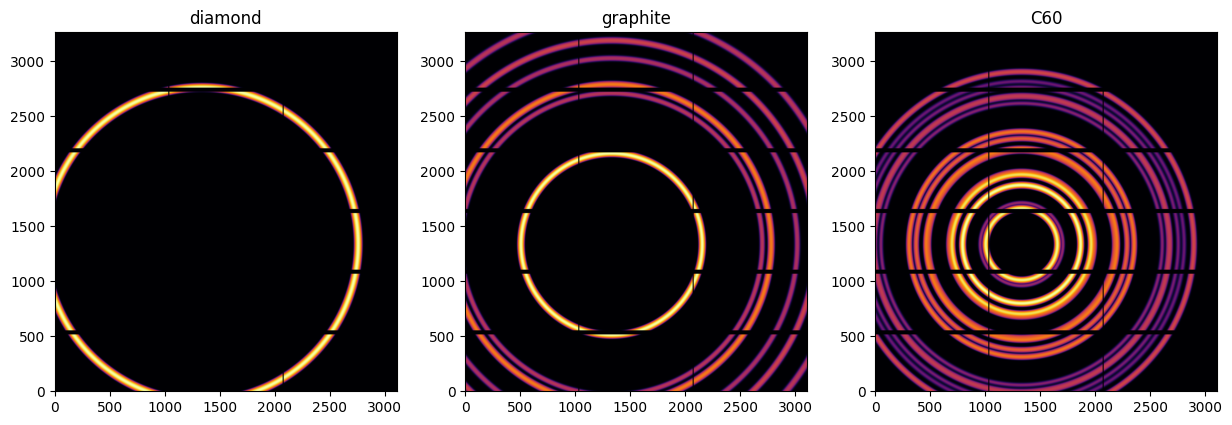

In [4]:
fig,ax = subplots(1,3, figsize=(15,5))
param["background"] = 10
param["Imax"] = 100
ai = pyFAI.load({"detector":"Eiger_9M", "wavelength":wavelength, "distance":0.2, "poni1": 0.1,"poni2": 0.1})
jupyter.display(diamond.fake_calibration_image(ai, **param), ax=ax[0], label="diamond")
jupyter.display(graphite.fake_calibration_image(ai, **param), ax=ax[1], label="graphite")
jupyter.display(C60.fake_calibration_image(ai, **param), ax=ax[2], label="C60");